# Proyecto Final Acamica: Deteccion de predadores sexuales a traves de chats(En Ingles)

### Dataset:https://zenodo.org/record/3713280
    El dataset es privado debido a lo delicado de su contenido, para tener acceso al mismo se debe solicitar acceso a su autor aclarando el uso que tendra.

### Organizacion:
    A) Realizar una corecta exploracion y entendimiento de los datos.
    B) Realizar un preprocesamiento de los datos.
    C) Aplicar Machine Learning.
            C.1) Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
            C.2) Elige un modelo benchmark.
    D)Aplicar Deep learning.
            D.1) Compara el benchmark con las redes neuronales.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import pandas_profiling as pdp

import gc
gc.enable()

import nltk
from nltk.tokenize import RegexpTokenizer

import spacy

!python -m spacy download en_core_web_md
!pip install wordcloud
!pip install pyspellchecker
!pip install contractions
!pip install imblearn
!pip install -U textblob
!python -m textblob.download_corpora
!pip install empath

import contractions
import en_core_web_md
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
from wordcloud import WordCloud 

import scattertext as st

from spellchecker import SpellChecker
import re

from textblob import TextBlob

from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [3]:
data = pd.read_csv("datapan12.csv")

# A)EDA

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,903604.0,451803.184627,260848.996073,0.0,225901.75,451803.5,677704.25,903606.0
predator,903604.0,0.045350,0.208070,0.0,0.00,0.0,0.00,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903604 entries, 0 to 903603
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       903604 non-null  int64 
 1   conversation id  903604 non-null  object
 2   author id        903604 non-null  object
 3   msg              903604 non-null  object
 4   time             903604 non-null  object
 5   predator         903604 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 41.4+ MB


In [6]:
data.head()

,Unnamed: 0,conversation id,author id,msg,time,predator
0,0,e621da5de598c9321a1d505ea95e6a2d,97964e7a9e8eb9cf78f2e4d7b2ff34c7,Hola.,03:20,0
1,1,e621da5de598c9321a1d505ea95e6a2d,0158d0d6781fc4d493f243d4caa49747,hi.,03:20,0
2,2,e621da5de598c9321a1d505ea95e6a2d,0158d0d6781fc4d493f243d4caa49747,whats up?,03:20,0
3,3,e621da5de598c9321a1d505ea95e6a2d,97964e7a9e8eb9cf78f2e4d7b2ff34c7,not a ton.,03:20,0
4,4,e621da5de598c9321a1d505ea95e6a2d,97964e7a9e8eb9cf78f2e4d7b2ff34c7,you?,03:20,0


In [7]:
data.tail()

,Unnamed: 0,conversation id,author id,msg,time,predator
903599,903602,4ed6b02ae537fdfd6078597b706292a8,74bfc043bd5ce9c17b37ffae6e0ba2fa,oh ok,22:36,0
903600,903603,4ed6b02ae537fdfd6078597b706292a8,8cd850ea4215ee7c4b94b6bcc0bae593,i will look for you tomorrow,22:36,1
903601,903604,4ed6b02ae537fdfd6078597b706292a8,74bfc043bd5ce9c17b37ffae6e0ba2fa,ok,22:36,0
903602,903605,4ed6b02ae537fdfd6078597b706292a8,8cd850ea4215ee7c4b94b6bcc0bae593,bye lissa,22:36,1
903603,903606,4ed6b02ae537fdfd6078597b706292a8,74bfc043bd5ce9c17b37ffae6e0ba2fa,bye jake,22:37,0


In [8]:
reporte = pdp.ProfileReport(data, title="Pandas Profiling Reporte",minimal=True)
reporte

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

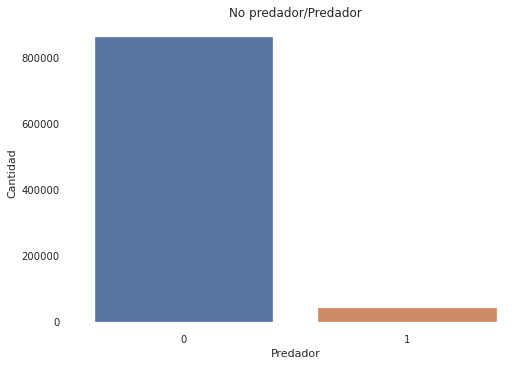

In [9]:
sns.countplot(data=data,x='predator',orient="h")
plt.title("No predador/Predador")
plt.xlabel("Predador")
plt.ylabel("Cantidad")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

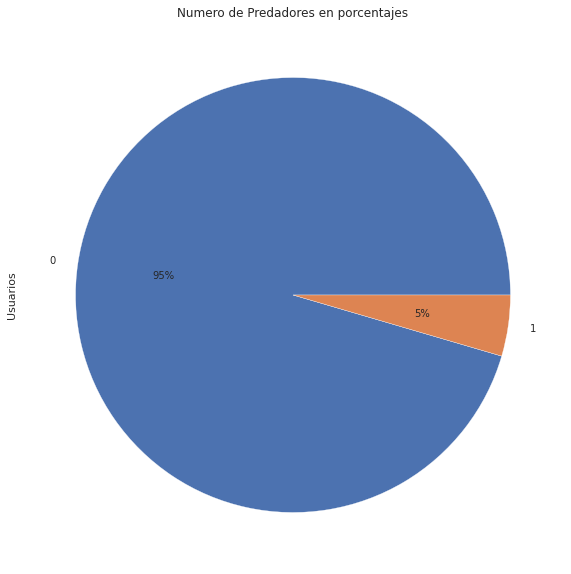

In [10]:
plt.figure(figsize=(10,10))
data.predator.value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.ylabel("Usuarios")

plt.title("Numero de Predadores en porcentajes")
plt.show

In [11]:
data['msg']=data['msg'].apply(str)

### Contar palabras

In [12]:
data['contara'] = data['msg'].apply(lambda x: len(str(x).split()))

In [13]:
data.head()

,Unnamed: 0,conversation id,author id,msg,time,predator,contara
0,0,e621da5de598c9321a1d505ea95e6a2d,97964e7a9e8eb9cf78f2e4d7b2ff34c7,Hola.,03:20,0,1
1,1,e621da5de598c9321a1d505ea95e6a2d,0158d0d6781fc4d493f243d4caa49747,hi.,03:20,0,1
2,2,e621da5de598c9321a1d505ea95e6a2d,0158d0d6781fc4d493f243d4caa49747,whats up?,03:20,0,2
3,3,e621da5de598c9321a1d505ea95e6a2d,97964e7a9e8eb9cf78f2e4d7b2ff34c7,not a ton.,03:20,0,3
4,4,e621da5de598c9321a1d505ea95e6a2d,97964e7a9e8eb9cf78f2e4d7b2ff34c7,you?,03:20,0,1


Text(0, 0.5, 'contara')

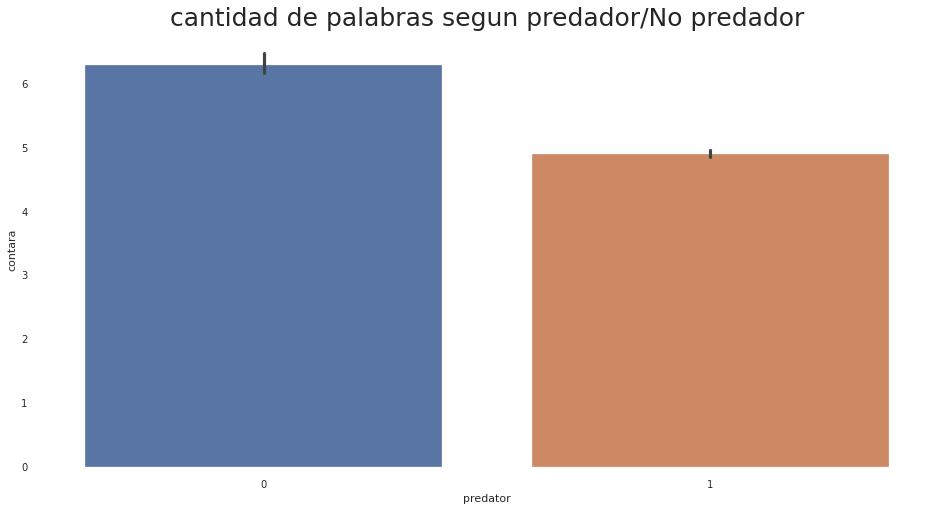

In [14]:
plt.figure(figsize=(16,8))
sns.barplot(data = data, x = "predator", y = "contara")
plt.title('cantidad de palabras segun predador/No predador', fontsize= 25)
plt.xlabel('predator')
plt.ylabel('contara')

### Predator=1

In [15]:
pred= data[data["predator"]== 1]

In [16]:
pred_user=pred["author id"].value_counts()
pred_user

a03edc2f70bbebc73ef3ba3f06968360    2307
fac3a2081264f1dbb943eaf7165d8fc3    2021
c62283536cf6261e5ffbcb323c8a2571    1670
0599cd3f7fc15849844468b0702ff593    1557
6283fab0062e2eb309261acf647abd98    1070
                                    ... 
02800e11fdb1b43595303709f2b38f8c      10
04d42f7bb1eb41605dea74a8711f9fd0       2
902cddc2765a0700c9d1d543c9a4d52f       2
d50f114dde2edb12b72ecea83ebf63ce       2
4c33926fc6765490b09943d81ec86469       1
Name: author id, Length: 142, dtype: int64

### Cantidad de predadores Sexuales

In [17]:
pred_user.shape

(142,)

### Analisis individual del usuario con mas mensajes

In [18]:
user_unique=data[data["author id"] == "a03edc2f70bbebc73ef3ba3f06968360" ]
user_unique.head(10)

,Unnamed: 0,conversation id,author id,msg,time,predator,contara
2487,2487,213e2838ea8be0cda7e54c087a20e418,a03edc2f70bbebc73ef3ba3f06968360,Hello,21:56,1,1
2489,2489,213e2838ea8be0cda7e54c087a20e418,a03edc2f70bbebc73ef3ba3f06968360,Whatcha doin?,21:57,1,2
2492,2492,213e2838ea8be0cda7e54c087a20e418,a03edc2f70bbebc73ef3ba3f06968360,Oh yeah hows brad and darla??? Lol,21:59,1,7
2495,2495,213e2838ea8be0cda7e54c087a20e418,a03edc2f70bbebc73ef3ba3f06968360,Thxs ;;),22:00,1,2
2497,2497,213e2838ea8be0cda7e54c087a20e418,a03edc2f70bbebc73ef3ba3f06968360,Oh i c lol,22:00,1,4
2498,2498,213e2838ea8be0cda7e54c087a20e418,a03edc2f70bbebc73ef3ba3f06968360,Idk,22:00,1,1
2499,2499,213e2838ea8be0cda7e54c087a20e418,a03edc2f70bbebc73ef3ba3f06968360,Yeah school is kinda boring.,22:03,1,5
2501,2501,213e2838ea8be0cda7e54c087a20e418,a03edc2f70bbebc73ef3ba3f06968360,They just do when u get older time slows down lol,22:05,1,11
2503,2503,213e2838ea8be0cda7e54c087a20e418,a03edc2f70bbebc73ef3ba3f06968360,Yeah,22:06,1,1
2504,2504,213e2838ea8be0cda7e54c087a20e418,a03edc2f70bbebc73ef3ba3f06968360,Well i going to eat i chat with u later.,22:07,1,10


In [19]:
user_unique.tail(10)

,Unnamed: 0,conversation id,author id,msg,time,predator,contara
899464,899467,7950df3ed8868871507820bb02c09998,a03edc2f70bbebc73ef3ba3f06968360,cool and get what,15:55,1,4
899467,899470,7950df3ed8868871507820bb02c09998,a03edc2f70bbebc73ef3ba3f06968360,nice,15:56,1,1
899469,899472,7950df3ed8868871507820bb02c09998,a03edc2f70bbebc73ef3ba3f06968360,i missed you too baby i cant wait to see you,15:56,1,11
899471,899474,7950df3ed8868871507820bb02c09998,a03edc2f70bbebc73ef3ba3f06968360,yuppers,15:57,1,1
899473,899476,7950df3ed8868871507820bb02c09998,a03edc2f70bbebc73ef3ba3f06968360,am flyin,15:57,1,2
899475,899478,7950df3ed8868871507820bb02c09998,a03edc2f70bbebc73ef3ba3f06968360,tomorrow moring 7am,15:57,1,3
899478,899481,7950df3ed8868871507820bb02c09998,a03edc2f70bbebc73ef3ba3f06968360,was suppose to but the my flight got canseled,15:59,1,9
899479,899482,7950df3ed8868871507820bb02c09998,a03edc2f70bbebc73ef3ba3f06968360,:-*,15:59,1,1
899481,899484,7950df3ed8868871507820bb02c09998,a03edc2f70bbebc73ef3ba3f06968360,its ok,16:00,1,2
899482,899485,7950df3ed8868871507820bb02c09998,a03edc2f70bbebc73ef3ba3f06968360,i still love you,16:00,1,4


### Analisis Individual de conversacion

In [20]:
pred_user_conv=pred["conversation id"].value_counts()
pred_user_conv

629a3f3a95f4d4253f0def5f6e4434f6    735
5c7e65f02a4ff4930f5cff4e44603609    515
83d02741da50d8a84485cb8d0cb39b88    475
57fac62074b0602711bf4ba54806f146    430
3c689a8b53787681208eb16e5618775f    391
                                   ... 
3984214aaf5f870d575a4f488385ffc4      1
4b61765a7ff31f0e951dda0d957e0c3b      1
07c9aee8958755db53c0ed7521a1cf68      1
46aec5c8cb99eb661aa3c039b7be6f28      1
af9923a77e580a5196f01ab0910fed65      1
Name: conversation id, Length: 2016, dtype: int64

In [21]:
pred_user_conv.shape

(2016,)

In [22]:
conv_unique=data[data["conversation id"] == "629a3f3a95f4d4253f0def5f6e4434f6" ]
conv_unique.head(10)

,Unnamed: 0,conversation id,author id,msg,time,predator,contara
111018,111018,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,BOO,19:30,1,1
111019,111019,629a3f3a95f4d4253f0def5f6e4434f6,6a37e1546ace47686185ac3fab4f99b4,:),19:31,0,1
111020,111020,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,how are you ?,19:31,1,4
111021,111021,629a3f3a95f4d4253f0def5f6e4434f6,6a37e1546ace47686185ac3fab4f99b4,feelin better now :D,19:32,0,4
111022,111022,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,oh thats good,19:32,1,3
111023,111023,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,just getting out of bed?,19:32,1,5
111024,111024,629a3f3a95f4d4253f0def5f6e4434f6,6a37e1546ace47686185ac3fab4f99b4,lol yea had good nap,19:33,0,5
111025,111025,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,oh,19:33,1,1
111026,111026,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,how was your nap?,19:33,1,4
111027,111027,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,still sleepy?,19:34,1,2


In [23]:
conv_unique.tail(10)

,Unnamed: 0,conversation id,author id,msg,time,predator,contara
112174,112174,629a3f3a95f4d4253f0def5f6e4434f6,6a37e1546ace47686185ac3fab4f99b4,>:D<:-*:x,01:42,0,1
112175,112175,629a3f3a95f4d4253f0def5f6e4434f6,6a37e1546ace47686185ac3fab4f99b4,dont let bed bugs bute,01:42,0,5
112176,112176,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,and dont let the bed bugs bite,01:42,1,7
112177,112177,629a3f3a95f4d4253f0def5f6e4434f6,6a37e1546ace47686185ac3fab4f99b4,bite lol,01:42,0,2
112178,112178,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,:P,01:42,1,1
112179,112179,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,bye sweet chloe,01:42,1,3
112180,112180,629a3f3a95f4d4253f0def5f6e4434f6,6a37e1546ace47686185ac3fab4f99b4,bye sweeeter jerry,01:42,0,3
112181,112181,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,;),01:43,1,1
112182,112182,629a3f3a95f4d4253f0def5f6e4434f6,6a37e1546ace47686185ac3fab4f99b4,>:D<,01:43,0,1
112183,112183,629a3f3a95f4d4253f0def5f6e4434f6,2a751a42619e8a40bf5115cb62135a69,>:D<:,01:43,1,1


### Columnas con solo un valor

In [24]:
for i in range(data.shape[1]):
    print(i,len(pd.unique(data.iloc[:,i])))

0 903604
1 66927
2 97689
3 599163
4 1440
5 2
6 272


### Columnas con pocos valores

In [25]:
for i in range(data.shape[1]):
    num=len(pd.unique(data.iloc[:,i]))
    porcentaje=float(num)/data.shape[0]*100
    print("%d, %d, %.1f%%"%(i,num,porcentaje))

0, 903604, 100.0%
1, 66927, 7.4%
2, 97689, 10.8%
3, 599163, 66.3%
4, 1440, 0.2%
5, 2, 0.0%
6, 272, 0.0%


### Busqueda de duplicados

In [26]:
duplicado = data.duplicated()
print(duplicado.any())
print(data[duplicado])

False
Empty DataFrame
Columns: [Unnamed: 0, conversation id, author id, msg, time, predator, contara]
Index: []


### Eliminacion de columnas con poco valor

In [27]:
data.drop(["Unnamed: 0","conversation id","author id","time","contara"],axis=1,inplace=True)

In [28]:
data.head()

,msg,predator
0,Hola.,0
1,hi.,0
2,whats up?,0
3,not a ton.,0
4,you?,0


### NLP

In [29]:
nlp = en_core_web_md.load()

In [30]:
stopwords_spacy = list(STOP_WORDS)
print(stopwords_spacy)
len(stopwords_spacy)

['thereupon', 'nine', "'m", 'hereby', 'serious', 'noone', 'someone', 'there', '‘re', 'whenever', 'made', 'beforehand', 'ten', 'all', 'some', 'own', 'say', 'will', 'everything', 'whereby', 'whither', 'empty', 'fifty', 'otherwise', 'various', 'n’t', 'to', 'get', 'us', 'sometimes', 'nothing', 'five', 'became', 'throughout', 'although', "n't", 're', 'move', 'six', 'meanwhile', 'while', 'with', 'if', 'it', 'after', 'himself', '’m', '‘m', 'former', 'our', 'herself', 'please', 'few', 'nobody', 'therein', 'amongst', 'an', 'mostly', 'hers', 'of', 'during', 'was', 'here', 'part', '’s', 'now', 'is', 'the', 'each', 'go', 'they', 'how', 'these', 'others', 'other', 'eleven', "'ve", 'what', 'besides', 'ours', 'through', 'rather', 'back', 'those', 'least', 'into', 'been', 'thereafter', 'more', 'until', 'latter', 'than', 'ever', 'another', 'behind', 'further', '‘d', 'first', 'may', 'mine', 'this', 'on', '’re', 'though', 'nor', 'thus', 'almost', 'always', 'has', 'yet', "'d", 'had', 'she', 'by', 'but', '

326

In [31]:
en_stop_words=STOP_WORDS

### Activacion de Spellcheck

In [32]:
spell = SpellChecker(language='en',distance=1)

In [33]:
def spell_check(x):
    correct_word = []
    mispelled_word = x
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

### El dataset cuenta con 900.000 filas por lo que se dificulta su analisis sin sufrir un agotamiento de la RAM en poco tiempo. Para evitar este problema se lo procesara por partes y finalmente se volvera a unir.

In [34]:
pred1=data[data["predator"]== 1]

In [35]:
pred1.shape

(40978, 2)

In [36]:
pred0=data[data["predator"]== 0]

In [37]:
pred0.shape

(862626, 2)

In [38]:
pred0.head()

,msg,predator
0,Hola.,0
1,hi.,0
2,whats up?,0
3,not a ton.,0
4,you?,0


#### pred01= 0 a 250000

In [39]:
pred01=pred0[0:250000]

In [40]:
pred01.shape

(250000, 2)

#### pred02= 250000 a 500000

In [41]:
pred02=pred0[250000:500000]

In [42]:
pred02.shape

(250000, 2)

#### pred03= 500000 a 750000

In [43]:
pred03=pred0[500000:750000]

In [44]:
pred03.shape

(250000, 2)

#### pred04= 750000 a 862626

In [45]:
pred04=pred0[750000:862626]

In [46]:
pred04.shape

(112626, 2)

# B)Preprocesamiento de datos

#### Pred01 (Aprox 57 min)

In [ ]:
#%%time

#regexp=RegexpTokenizer(r"\w+")
#pred01['msg_lemm'] = ''

#for i in range(pred01.shape[0]):
#    msgs = pred01.iloc[i].msg
#    msgs = contractions.fix(msgs)
#    msgs = regexp.tokenize(msgs)
#    msgs = [word.lower() for word in msgs if word.lower() not in en_stop_words]
#    msgs = spell_check(msgs)
#    msgs = nlp(msgs)
#    msgs = [word.lemma_ for word in msgs]
#    pred01['msg_lemm'].iloc[i] = ' '.join(msgs)

In [ ]:
#pred01.to_csv('pred01.csv', index = False, encoding = 'utf-8')

In [47]:
pred01 = pd.read_csv("pred01.csv")

#### pred02 (Aprox 55 min)

In [ ]:
#%%time

#regexp=RegexpTokenizer(r"\w+")
#pred02['msg_lemm'] = ""

#for i in range(pred02.shape[0]):
#    msgs = pred02.iloc[i].msg
#    msgs = contractions.fix(msgs)
#    msgs = regexp.tokenize(msgs)
#    msgs = [word.lower() for word in msgs if word.lower() not in en_stop_words]
#    msgs = spell_check(msgs)
#    msgs = nlp(msgs)
#    msgs = [word.lemma_ for word in msgs]
#    pred02['msg_lemm'].iloc[i] = ' '.join(msgs)

In [ ]:
#pred02.to_csv('pred02.csv', index = False, encoding = 'utf-8')

In [48]:
#pred02 = pd.read_csv("pred02.csv")

#### pred03 (Aprox 50 min)

In [ ]:
#%%time

#regexp=RegexpTokenizer(r"\w+")
#pred03['msg_lemm'] = ""

#for i in range(pred03.shape[0]):
#    msgs = pred03.iloc[i].msg
#    msgs = contractions.fix(msgs)
#    msgs = regexp.tokenize(msgs)
#    msgs = [word.lower() for word in msgs if word.lower() not in en_stop_words]
#    msgs = spell_check(msgs)
#    msgs = nlp(msgs)
#    msgs = [word.lemma_ for word in msgs]
#    pred03['msg_lemm'].iloc[i] = ' '.join(msgs)

In [ ]:
#pred03.to_csv('pred03.csv', index = False, encoding = 'utf-8')

In [49]:
#pred03 = pd.read_csv("pred03.csv")

#### pred04 (Aprox 20 min)

In [ ]:
#%%time

#regexp=RegexpTokenizer(r"\w+")
#pred04['msg_lemm'] = ""

#for i in range(pred04.shape[0]):
#    msgs = pred04.iloc[i].msg
#    msgs = contractions.fix(msgs)
#    msgs = regexp.tokenize(msgs)
#    msgs = [word.lower() for word in msgs if word.lower() not in en_stop_words]
#    msgs = spell_check(msgs)
#    msgs = nlp(msgs)
#    msgs = [word.lemma_ for word in msgs]
#    pred04['msg_lemm'].iloc[i] = ' '.join(msgs)

In [ ]:
#pred04.to_csv('pred04.csv', index = False, encoding = 'utf-8')

In [50]:
#pred04 = pd.read_csv("pred04.csv")

#### pred1 (Aprox 6 min)

In [ ]:
#%%time

#regexp=RegexpTokenizer(r"\w+")
#pred1['msg_lemm'] = ''

#for i in range(pred1.shape[0]):
#    msgs = pred1.iloc[i].msg
#    msgs = contractions.fix(msgs)
#    msgs = regexp.tokenize(msgs)
#    msgs = [word.lower() for word in msgs if word.lower() not in en_stop_words]
#    msgs = spell_check(msgs)
#    msgs = nlp(msgs)
#    msgs = [word.lemma_ for word in msgs]
#    pred1['msg_lemm'].iloc[i] = ' '.join(msgs)

In [ ]:
#pred1.to_csv('pred1.csv', index = False, encoding = 'utf-8')

In [51]:
pred1 = pd.read_csv("pred1.csv")

### Union de los preds

#### Aqui puede utilizar todo el dataset o solo trabajar con partes.

In [52]:
data=pd.concat([pred01,pred1])
data.head()

,msg,predator,msg_lemm
0,Hola.,0,hola
1,hi.,0,hi
2,whats up?,0,NaN
3,not a ton.,0,ton
4,you?,0,NaN


In [53]:
data = data.dropna()

In [54]:
data.shape

(267629, 3)

### Eliminacion de PRON y HTTPS

In [55]:
data=data.drop(data[data.msg_lemm.str.contains("PRON")| data.msg_lemm.str.contains("http")].index)

In [56]:
data.shape

(249415, 3)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249415 entries, 0 to 40977
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msg       249415 non-null  object
 1   predator  249415 non-null  int64 
 2   msg_lemm  249415 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.6+ MB


### Visualizacion de palabras

In [58]:
data_pred = data[data.predator == 1]
data_nopred = data[data.predator == 0]

In [59]:
data_pred.shape

(34172, 3)

In [60]:
data_nopred.shape

(215243, 3)

### Predadores

In [61]:
predators = []
regexp=RegexpTokenizer(r"\w+")

for i in range(data_pred.shape[0]):
    x = data_pred.iloc[i].msg_lemm
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1]
    predators.append(x) 

In [62]:
pred=[line for line in predators for line in set(line)]
pred = Counter(pred)
pred = pred.most_common(20)
pred=pd.DataFrame(pred,columns = ['Words', 'Frequency'])
pred.head(10)

,Words,Frequency
0,ok,2655
1,want,1844
2,lol,1757
3,like,1344
4,go,1073
5,know,1049
6,good,920
7,get,804
8,yes,789
9,ur,787


### No predadores

In [63]:
no_predators = []
regexp=RegexpTokenizer(r"\w+")

for i in range(data_nopred.shape[0]):
    x = data_nopred.iloc[i].msg_lemm
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    no_predators.append(x) 

In [64]:
nopred=[line for line in no_predators for line in set(line)]
nopred = Counter(nopred)
nopred = nopred.most_common(20)
nopred=pd.DataFrame(nopred,columns = ['Words', 'Frequency'])
nopred.head(10)

,Words,Frequency
0,hi,11146
1,hey,6472
2,like,6307
3,apos,6146
4,asl,5767
5,quit,4955
6,want,4761
7,ok,4470
8,know,4161
9,think,4025


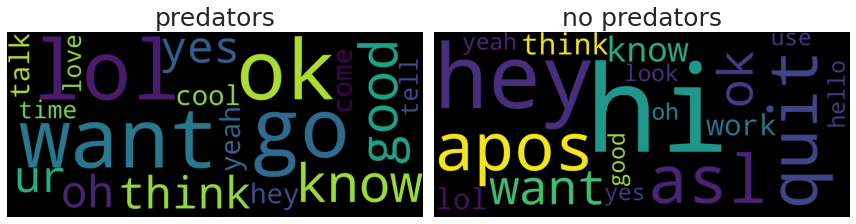

In [65]:
plt.figure(figsize=(12,12))

plt.subplot(321)
preds=(" ").join(pred["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800 ).generate(preds)
plt.imshow(wc)
plt.axis("off")
plt.title('predators', fontsize=25)

plt.subplot(322)
nopreds=(" ").join(nopred["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(nopreds)
plt.imshow(wc)
plt.axis("off")
plt.title('no predators', fontsize=25)

plt.tight_layout()
plt.show()

### Scattertext (25 min aprox)

### Msg_lemm

In [66]:
data2 = data.copy()

In [67]:
data2['cat']=data['predator'].astype("category").cat.rename_categories({0:'nopred',1:'pred'})

In [68]:
%%time

scatter_corpus_nlp = st.CorpusFromPandas(data2,
                             category_col='cat',
                             text_col='msg_lemm',nlp=nlp).build()

CPU times: user 30min 1s, sys: 6.43 s, total: 30min 8s
Wall time: 30min 28s


### Visualizacion de terminos asociados a predadores/no predadores

In [69]:
html = st.produce_scattertext_explorer(scatter_corpus_nlp,
         category='pred',category_name='predator',         
        not_category_name='nopred',width_in_pixels=1000,
          metadata=data2['cat'])
open("preds-Visualization.html", 'wb').write(html.encode('utf-8'))
IFrame(src='preds-Visualization.html', width = 1300, height=700)

### Visualizacion de terminos especificos pero que tienen baja ocurrencia en comparacion con terminos generales (31 min aprox)

In [70]:
%%time

feat_builder = st.FeatsFromOnlyEmpath()
empath_corpus = st.CorpusFromParsedDocuments(data2,
                                              category_col='cat',
                                              feats_from_spacy_doc=feat_builder,
                                              parsed_col='msg_lemm').build()
html = st.produce_scattertext_explorer(empath_corpus,
                                        category='pred',
                                        category_name='predator',
                                        not_category_name='nopred',
                                        width_in_pixels=1000,
                                        metadata=data2['cat'],
                                        use_non_text_features=True,
                                        use_full_doc=True,
                                        topic_model_term_lists=feat_builder.get_top_model_term_lists())
open("Visualization-Empath.html", 'wb').write(html.encode('utf-8'))
IFrame(src='Visualization-Empath.html', width = 1300, height=700)

CPU times: user 39min 28s, sys: 2.22 s, total: 39min 30s
Wall time: 39min 46s


### TextBlob

### POS msg_lemm

In [71]:
blob = TextBlob(str(data['msg_lemm']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 6 Part-of-speech tagging para msg_lemm')

# C)Machine Learning

In [72]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data['msg_lemm']), 
                                                    np.array(data['predator']), stratify = np.array(data['predator']),
                                                    test_size = 0.20, random_state = 42)

tfidf = TfidfVectorizer(min_df = 0.00015, norm = 'l2', use_idf = True, smooth_idf = True)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(199532, 2448)
(49883, 2448)


In [73]:
all_words = tfidf.get_feature_names()

### SMOTE: para dataset imbalanceado

In [74]:
over = SMOTE(random_state=42)
under = RandomUnderSampler(random_state=42)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [75]:
X_train, y_train = pipeline.fit_resample(X_train, y_train)


In [76]:
X_train = X_train.astype(np.uint8)
X_test = X_test.astype(np.uint8)

# C.1)Metrica

### Para el desarrollo del presente trabajo utilizaremos 2 metricas:

    Accuracy: Debido a que se trabajara con un dataset balanceado, esto es posible despues de procesar los datos con SMOTE Y RandomUnderSampler

    F1: Esta metrica se utilizara como complemento y para mostrar el poder de los modelos, ya que nos da una vision mas integral al tener en cuenta tanto el accuracy como el recall del modelo.
    
#### Vale aclarar que F1 es una metrica nula para las redes neuronales, esto se debe a que F1 trabaja con la globalidad y las redes neuronales funcionan analizando los batchs. Aun asi fue incluida esta medida como forma demostrativa. Pero en este caso se recomienda guiarse con accuracy o en su caso val_accuracy

# C.2) Benchmark

### LinearSVC

In [77]:
svc = LinearSVC(C = 0.1)
svc.fit(X_train.todense(),y_train)

LinearSVC(C=0.1)

In [78]:
y_train_pred = svc.predict(X_train.todense())
y_test_pred = svc.predict(X_test.todense())

print("Accuracy train LinearSVC: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test LinearSVC: ", accuracy_score(y_test, y_test_pred))

Accuracy train LinearSVC:  0.6196499297304203
Accuracy test LinearSVC:  0.7875628971793998


In [79]:
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     43049
           1       0.29      0.39      0.33      6834

    accuracy                           0.79     49883
   macro avg       0.59      0.62      0.60     49883
weighted avg       0.81      0.79      0.80     49883



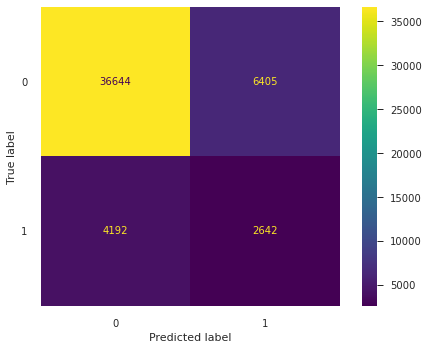

In [80]:
plot_confusion_matrix(svc, X_test.todense(), y_test)  

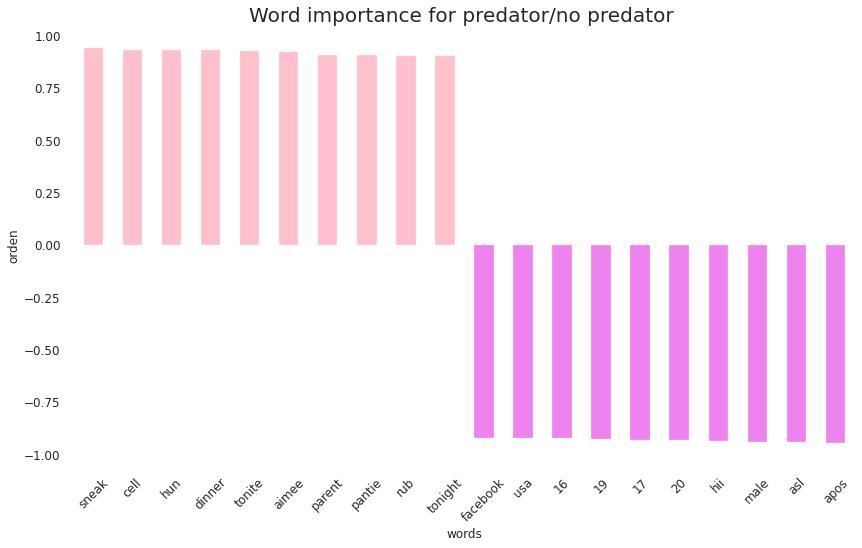

In [81]:
coeff = list(svc.coef_[0])
labels = list(all_words)
importancia = pd.DataFrame()
importancia['words'] = labels
importancia['orden'] = coeff
importancia = importancia.reset_index(drop=True)
orden_imp = importancia.sort_values(by=['orden'], ascending=False)
orden_imp = orden_imp.reset_index(drop=True)
plot = pd.concat([orden_imp.head(10), orden_imp.tail(10)])
plot.sort_values(by=['orden'], ascending=False, inplace = True)
plot['vpos'] = plot['orden'] > 0
plot.set_index('words', inplace = True)
plot.orden.plot(kind='bar', figsize = (14,8),color = plot.vpos.map({True: 'pink', False: 'violet'}),fontsize=12,orientation=u'vertical')
plt.xlabel ('words', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel ('orden', rotation = 90, fontsize=12)
plt.title ('Word importance for predator/no predator ',fontsize=20)
plt.show()

### Aqui nuestro modelo de LinearSVC sera nuestro benchmark. A partir de este punto implementaremos Redes Neuronales.

# D) Deep Learning

In [82]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers.core import SpatialDropout1D
import keras
from keras.layers.convolutional import Conv1D   
from numpy import array
from numpy import asarray
from numpy import zeros

### Metricas globales

In [83]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Earlystopping

In [84]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=20,
    restore_best_weights=True
)

In [85]:
x = {0: 0,1:1}

data['binario'] = data['predator'].map(x)

In [86]:
X = data['msg_lemm']
y = data["binario"].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

### Red Neuronal Simple

In [88]:
max_words = 5000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = tokenizer.sequences_to_matrix(X_train, mode='count')
X_test = tokenizer.sequences_to_matrix(X_test, mode='count')


num_classes = max(y_train) + 1

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [89]:
model = Sequential()
model.add(Dense(128, input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [90]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
print(model.metrics_names)

[]


In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640128    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [92]:
batch_size = 32
epochs = 50

In [93]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.3,callbacks=[custom_early_stopping])

Epoch 1/50
3820/3820 [==============================] - 25s 6ms/step - loss: 0.3588 - accuracy: 0.8633 - f1_m: 0.8633 - precision_m: 0.8633 - recall_m: 0.8633 - val_loss: 0.3037 - val_accuracy: 0.8708 - val_f1_m: 0.8708 - val_precision_m: 0.8708 - val_recall_m: 0.8708
Epoch 2/50
3820/3820 [==============================] - 20s 5ms/step - loss: 0.2915 - accuracy: 0.8735 - f1_m: 0.8735 - precision_m: 0.8735 - recall_m: 0.8735 - val_loss: 0.2939 - val_accuracy: 0.8731 - val_f1_m: 0.8731 - val_precision_m: 0.8731 - val_recall_m: 0.8731
Epoch 3/50
3820/3820 [==============================] - 21s 5ms/step - loss: 0.2830 - accuracy: 0.8755 - f1_m: 0.8755 - precision_m: 0.8755 - recall_m: 0.8755 - val_loss: 0.2950 - val_accuracy: 0.8741 - val_f1_m: 0.8741 - val_precision_m: 0.8741 - val_recall_m: 0.8741
Epoch 4/50
3820/3820 [==============================] - 20s 5ms/step - loss: 0.2758 - accuracy: 0.8791 - f1_m: 0.8791 - precision_m: 0.8791 - recall_m: 0.8791 - val_loss: 0.2956 - val_accuracy:

In [94]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2339/2339 [==============================] - 7s 3ms/step - loss: 0.2932 - accuracy: 0.8744 - f1_m: 0.8744 - precision_m: 0.8744 - recall_m: 0.8744
Test loss: 0.29320812225341797
Test accuracy: 0.87440025806427


### Convolucional

In [95]:
X = data['msg_lemm']
y = data["binario"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

MAX_NB_WORDS = 5000

MAX_SEQUENCE_LENGTH = 20

EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)

tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)



num_classes = max(y_train) + 1

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [96]:
EMBEDDING_DIM=100

In [97]:
model = Sequential()
embedding_layer= (Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(embedding_layer)
model.add(Conv1D(300, 5, activation='relu'))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(150, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 100)           500000    
_________________________________________________________________
conv1d (Conv1D)              (None, 16, 300)           150300    
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 300)           0         
_________________________________________________________________
global_max_pooling1d (Global (None, 300)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               45150     
_________________________________________________________________
dropout_5 (Dropout)          (None, 150)              

In [99]:
epochs = 300
batch_size = 512

In [100]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.3,callbacks=[custom_early_stopping])

Epoch 1/300
239/239 [==============================] - 7s 18ms/step - loss: 0.3976 - acc: 0.8640 - f1_m: 0.8640 - precision_m: 0.8640 - recall_m: 0.8640 - val_loss: 0.3039 - val_acc: 0.8631 - val_f1_m: 0.8629 - val_precision_m: 0.8629 - val_recall_m: 0.8629
Epoch 2/300
239/239 [==============================] - 4s 16ms/step - loss: 0.3045 - acc: 0.8647 - f1_m: 0.8647 - precision_m: 0.8647 - recall_m: 0.8647 - val_loss: 0.2975 - val_acc: 0.8702 - val_f1_m: 0.8700 - val_precision_m: 0.8700 - val_recall_m: 0.8700
Epoch 3/300
239/239 [==============================] - 4s 17ms/step - loss: 0.2901 - acc: 0.8705 - f1_m: 0.8705 - precision_m: 0.8705 - recall_m: 0.8705 - val_loss: 0.2952 - val_acc: 0.8713 - val_f1_m: 0.8712 - val_precision_m: 0.8712 - val_recall_m: 0.8712
Epoch 4/300
239/239 [==============================] - 4s 16ms/step - loss: 0.2789 - acc: 0.8751 - f1_m: 0.8751 - precision_m: 0.8751 - recall_m: 0.8751 - val_loss: 0.2979 - val_acc: 0.8703 - val_f1_m: 0.8702 - val_precision_m

In [101]:
score= model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

147/147 [==============================] - 1s 4ms/step - loss: 0.5737 - acc: 0.8620 - f1_m: 0.8621 - precision_m: 0.8621 - recall_m: 0.8621
Test loss: 0.5736707448959351
Test accuracy: 0.86202472448349


# D.1) Compara el benchmark con las redes neuronales.

### Resultados Obtenidos:
       
       •LinearSVC:
           Accuracy en train:0.6196
           Accuracy en Test:0.7875
           F1 score: 0.79
           
       •Red neuronal simple:
           Accuracy en train: 0.9096
           Accuracy en test:0.8743
           F1 score:0.8743
           
       •Convolucional:
           Accuracy en train:0.9188
           Accuracy en test:0.8603
           F1 score:0.8604
           

#### Al momento de comparar los modelos vemos una mejora significativa al momento de utilizar redes neuronales, pasando de un acc de 0.79 en LinearSVC a un acc de 0.87 con una red neuronal personalizada. Sin duda podemos ver el gran poder que tiene el deep learning en esta area, donde ha demostrado una gran ventaja en este caso en concreto.

#### Personalmente esto era algo de esperarse, a pesar de no tener grandes conocimientos en Deep Learning y no poder garantizar el mejor modelo para este caso. Si puedo señalar que el modelo hecho personalmente ha superado a un LinearSVC, algo que considero un pequeño logro.

#### El unico punto que puedo destacar como positivo para el LinearSVC, es que el mismo no cae en overfitting, los resultados logrados en este sentido son excelentes, y si consideramos la simplicididad de su utilizacion, deberia ser el primer paso para cualquiera que intente realizar este desafio. Por otro lado al ver los resultados de las redes neuronales, podemos ver un pequeño overfitting en los resultados, problema que puede ser tratado con un aumento de dropouts o noise. Pero al momento de intentar reducirlo he de destacar que no lo he logrado, esto puede deberse a mi desconocimiento en la arquitectura de redes o a los datos mismos.